In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
# Step 1: Load the dataset
# Load iris dataset
df = pd.read_csv('iris6th.csv')

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [19]:
# 3: Data Preprocessing
# Check for Missing Values


print(df.isnull().sum())  # Ensure all values are present

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [20]:



# Option 1: Drop rows with missing values
# df = df.dropna()

# Option 2: Impute missing values with mean (for numerical columns)
df['sepal_length'] = df['sepal_length'].fillna(df['sepal_length'].mean())
df['sepal_width'] = df['sepal_width'].fillna(df['sepal_width'].median())
df['petal_length'] = df['petal_length'].fillna(df['petal_length'].mean())
df['petal_width'] = df['petal_width'].fillna(df['petal_width'].median())

# Option 3: Impute missing values in categorical columns with mode (for species)
df['species'] = df['species'].fillna(df['species'].mode()[0])

# Verify if there are any remaining missing values
print(df.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [21]:
# .2 Describe Dataset

print(df.describe())
print(df.dtypes)

       sepal_length  sepal_width  petal_length  petal_width
count     81.000000    81.000000     81.000000    81.000000
mean       5.945679     3.033333      3.946914     1.264198
std        0.840097     0.448330      1.745357     0.740829
min        4.300000     2.000000      1.100000     0.100000
25%        5.300000     2.800000      1.600000     0.400000
50%        6.000000     3.000000      4.500000     1.400000
75%        6.500000     3.200000      5.100000     1.800000
max        7.700000     4.400000      6.900000     2.500000
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


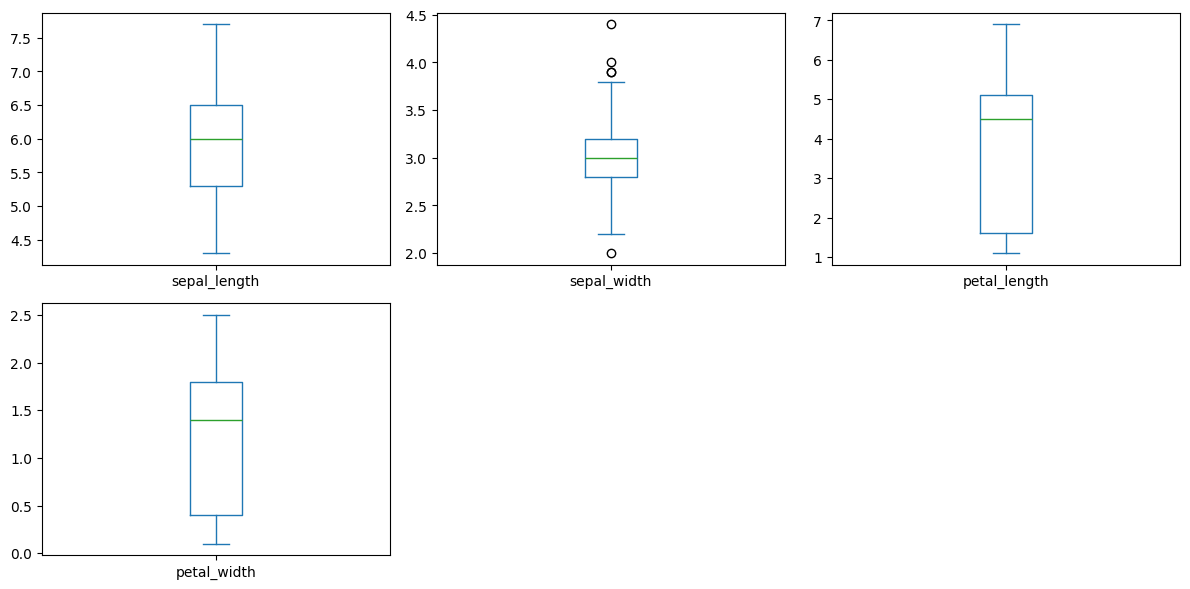

In [22]:
# Check for Outliers 

# Boxplot for visual outlier detection
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(12,6))
plt.tight_layout()
plt.show()

In [23]:
#  Normalize the Data

# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
 # Split Data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [25]:
# : Naïve Bayes Classification

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

In [26]:
# Step 6: Confusion Matrix and Metrics

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy & Error
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")

Confusion Matrix:
 [[6 0 0]
 [0 7 0]
 [0 0 4]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         7
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Accuracy: 1.00
Error Rate: 0.00


In [27]:
# Extract TP, TN, FP, FN for each class (multiclass case)
labels = df['species'].unique()
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)


            setosa  versicolor  virginica
setosa           6           0          0
versicolor       0           7          0
virginica        0           0          4


In [28]:
# Step 6: Compute TP, FP, TN, FN, Accuracy, Error Rate, Precision, Recall
total = np.sum(cm)
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - (TP + FP + FN)

    accuracy = (TP + TN) / total
    error_rate = 1 - accuracy
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    print(f"\nClass: {label}")
    print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
    print(f"Accuracy: {accuracy:.2f}, Error Rate: {error_rate:.2f}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")


Class: setosa
TP: 6, FP: 0, FN: 0, TN: 11
Accuracy: 1.00, Error Rate: 0.00
Precision: 1.00, Recall: 1.00

Class: versicolor
TP: 7, FP: 0, FN: 0, TN: 10
Accuracy: 1.00, Error Rate: 0.00
Precision: 1.00, Recall: 1.00

Class: virginica
TP: 4, FP: 0, FN: 0, TN: 13
Accuracy: 1.00, Error Rate: 0.00
Precision: 1.00, Recall: 1.00


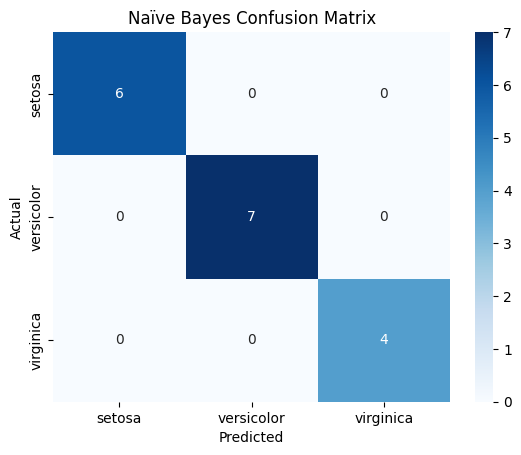

In [29]:
 # Confusion Matrix Heatmap

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naïve Bayes Confusion Matrix')
plt.show()